In [1]:
%pip install tensorflow matplotlib seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
eth-brownie 1.20.4 requires wrapt==1.16.0, but you have wrapt 1.14.1 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import  to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(f"Training data shape: {x_train.shape}")
print(f"Training label shape: {y_train.shape}")

Training data shape: (60000, 28, 28)
Training label shape: (60000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

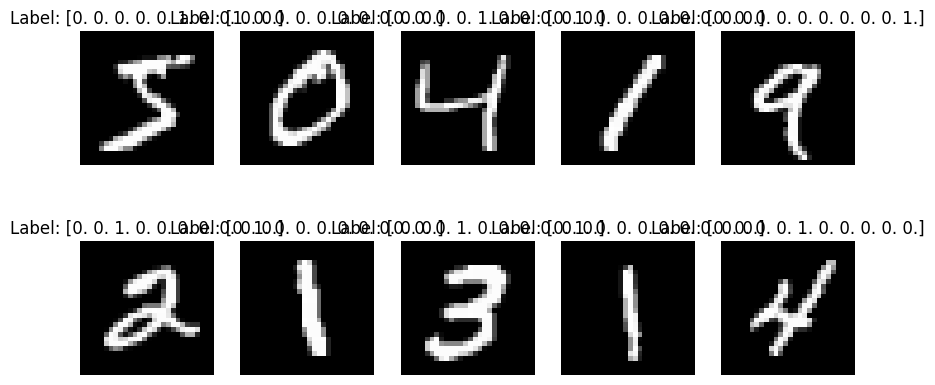

In [8]:
plt.figure(figsize = (10, 5))

for i in range(10): 
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

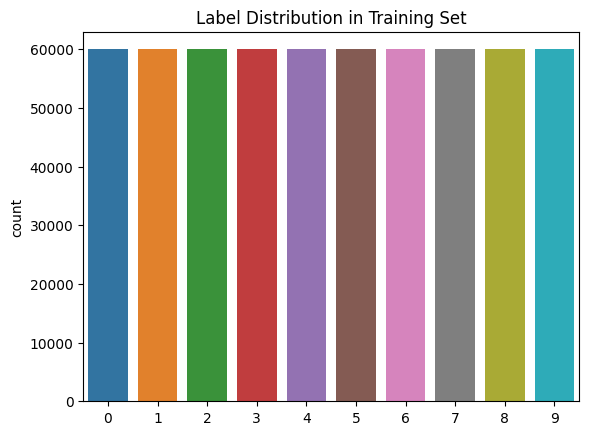

In [9]:
sns.countplot(y_train)
plt.title("Label Distribution in Training Set")
plt.show()

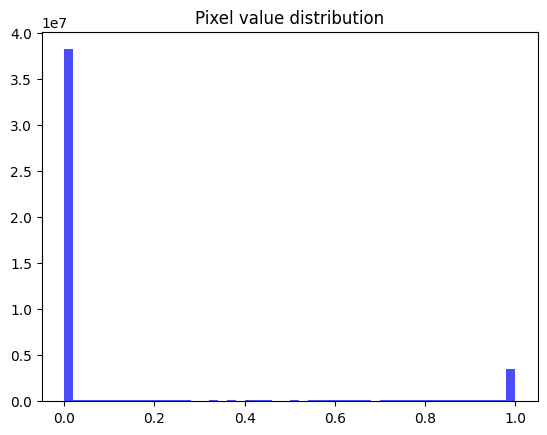

In [10]:
flat_images = x_train.reshape(-1)

plt.hist(flat_images, bins = 50, color = 'blue', alpha = 0.7)
plt.title('Pixel value distribution')
plt.show()

In [11]:
model = models.Sequential()

In [12]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10


750/750 [==============================] - 16s 19ms/step - loss: 0.2166 - accuracy: 0.9333 - val_loss: 0.0570 - val_accuracy: 0.9835
Epoch 2/10
750/750 [==============================] - 14s 18ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 3/10
750/750 [==============================] - 13s 18ms/step - loss: 0.0371 - accuracy: 0.9877 - val_loss: 0.0388 - val_accuracy: 0.9896
Epoch 4/10
750/750 [==============================] - 14s 18ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0450 - val_accuracy: 0.9870
Epoch 5/10
750/750 [==============================] - 16s 22ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0366 - val_accuracy: 0.9895
Epoch 7/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0383 - val_accurac

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


In [16]:
model.save('./model.h5')

c:\Users\vicky\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
